### AIDI 2001 Mid-Term Exam


In [ ]:
# Enter your name and student_id and run the cell
name = "Candido Regis"
student_id = "123456789"

In [2]:
# run this cell (Don't modify)
exam_size = 5
magic_number = sum([int(ele) for ele in student_id])%exam_size
diagram_nr = magic_number
print(f"Your network diagram is #{diagram_nr} ")

Your network diagram is #3 


In [3]:
# run this cell. (You are only allowed to use  the following libraries)
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# run this cell
data_size = 100
weights_size = 6
adjustable_weights_length = 4
weights_filter = np.ones(weights_size)
if magic_number < adjustable_weights_length:
    weights_filter[magic_number] = 0


In [5]:
#run this cell: Synthetic data generation

np.random.seed(10)
X1 = np.random.normal(5, 2, data_size).reshape(-1,1)
X2 = np.random.normal(10, 2, data_size).reshape(-1,1)

w_fixed = np.array([2.1, 1.3, 1.1, 0.1, 1.8, 0.6]) * weights_filter
H1 = w_fixed[0]* X1 + w_fixed[1]* X2 
H2 = w_fixed[2]* X1 + w_fixed[3]* X2 
Y = w_fixed[4]*H1 + w_fixed[5]*H2

In [8]:
# Implement an ANN model using the network architecture diagram assigned to you (see attached file in the mid-term submission folder)
# Note: Some weights are not relevent for your network, so you shouldn't update them (marks will be deducted if your solution update irrelevent weights )
# You can change the Learning rates and nr_epochs, however, please leave the initial weights (all equal to 0.1) as it is.
def my_ANN_model(x1, x2, y, Learning_Rate=0.001, nr_epochs=20, w0=0.1, w1=0.1, w2=0.1, w3=0.1, w4=0.1, w5=0.1, costs=[]):

    # Get the number of samples
    m = len(y)
    
    # Training loop
    for epoch in range(nr_epochs):
        # Forward propagation
        # Hidden layer nodes
        h1 = w0 * x1 + w1 * x2  # First hidden node
        h2 = w2 * x1 + w3 * x2  # Second hidden node
        
        # Output layer
        output = w4 * h1 + w5 * h2
        
        # Compute cost (Mean Squared Error)
        cost = (1/(2*m)) * np.sum((output - y)**2)
        costs.append(cost)
        
        # Backpropagation
        # Compute gradients
        dL_dOutput = (1/m) * (output - y)
        
        # Gradients for output layer weights
        dL_dW4 = np.sum(dL_dOutput * h1)
        dL_dW5 = np.sum(dL_dOutput * h2)
        
        # Gradients for hidden layer
        dL_dH1 = dL_dOutput * w4
        dL_dH2 = dL_dOutput * w5
        
        # Gradients for input layer weights
        dL_dW0 = np.sum(dL_dH1 * x1)
        dL_dW1 = np.sum(dL_dH1 * x2)
        dL_dW2 = np.sum(dL_dH2 * x1)
        
        # Update weights
        w0 -= Learning_Rate * dL_dW0
        w1 -= Learning_Rate * dL_dW1
        w2 -= Learning_Rate * dL_dW2
        w4 -= Learning_Rate * dL_dW4
        w5 -= Learning_Rate * dL_dW5

    return w0, w1, w2, w3, w4, w5, costs # weights associated with the two input parameters and a list containing the cost values for each training epoch


In [9]:
w1, w2, w3, w4, w5, w6, costs = my_ANN_model(X1, X2, Y)

In [10]:
print(f"initial weights {w_fixed}")
print(f"weights calculated by {name} model {w1, w2, w3, w4, w5, w6}")

initial weights [2.1 1.3 1.1 0.  1.8 0.6]
weights calculated by Candido Regis model (1.1131593651606775, 1.5948399270195068, 0.7277599578502877, 0.1, 1.9435377847272197, 0.8668845691342806)


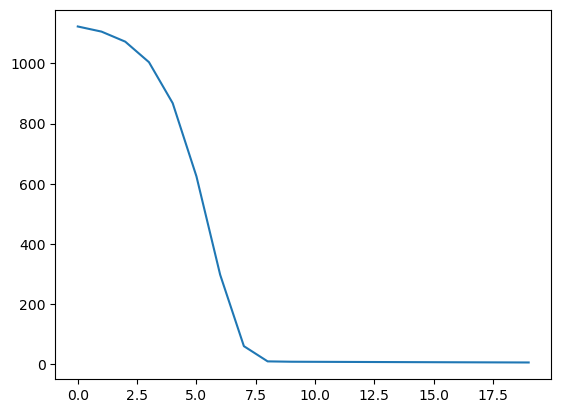

In [11]:
plt.plot(costs)

#### Rename the file to: <b> your_name_student_id_mid_term.ipynp </b>
#### Run all the cells (in vs-code: Run All)
#### Save the file
#### Upload the file to <b> mid-term </b> submission folder